#Radiometer Experiment 5 - Performance vs bandwidth

Recall from Exp 1 where we looked at $NE\Delta T$ which lets us know what the sensitivity or performance of the radiometer will be.  Recall the following equation for $NE\Delta T$


(1)  $$NE\Delta T=\frac{T_{A}+T_{sys}}{\sqrt{\beta  \tau}}$$

Our sensitivity is based on the amount of noise we have from both the antenna or $T_{A}$ plus the addition of our system noise which is $T_{sys}$.  Finally our bandwidth of the signal, $\beta$ and our integration time, $\tau$, are the final factors that determine our $NE\Delta T$.

Our integration time is controllable, and can be set using the GUI panel for the software defined radio.  In a typical radiometer, we often do not have any control of the bandwidth.  It is often set by the mechanical bandwidth filters that are placed in front of the LNAs and the detection circuit to detect the noise power.  In a software defined radio radio we do have more control on bandwidth as we can change our sampling rate which in turns controls our bandwidth.  However, there is a limit as larger sampling rates require more data and processing bandwidth to process.  

In addtion, recall from Exp 4 where we filtered out an offending signal.  While this allows us to filter out the offending signal and resume total power measurements, it comes at a cost of reducing the overall bandwidth available for power detection.  In Experiment 4 we looked at this and derived the following equation

(2)  $$NE\Delta T=\frac{T_{A}+T_{sys}}{\sqrt{(\beta - \beta_{filter})  \tau}}$$

This equation now takes into account the substraction of the filter.  The width of the band reject filter used then affects our $NE\Delta T$ and thus our performace of the radiometer.  



Let's look at an example of this.  To begin with we will assume that our $T_{A}$ and $T_{sys}$ are fixed, let's assign them a value of 450 kelvin.  We will also set our integration time to a fixed value as well, in this case we will set it to 2 seconds.  We will start with a bandwdith of 10 MHz.  In Python we can assign these values now, we will also setup our environment.

In [1]:
%pylab inline
import scipy
import numpy
import scipy.io as sio

Populating the interactive namespace from numpy and matplotlib


In [2]:
tau = 2
BSDR = 10e6
Tsys = 450

Ok, let's calculate what our $NE\Delta T$ is with these values.

In [3]:
NEAT = Tsys/sqrt((BSDR)*tau)
print NEAT

0.100623058987


Now let's add a filter.  This filter shall have a bandwidth of 500 kHz that it is notching out.  We will now use equation (2) and subtract this filter from our overall bandwidth since our band-reject filter is not only removing the offending signal but also any other noise power information with it.

In [4]:
BFILTER = 500e3
NEAT_FILTER = Tsys/sqrt((BSDR-BFILTER)*tau)
print NEAT_FILTER

0.103237080242


As expected our $NE\Delta T$ has gone up.  This means that we are not able to detect as small of a change as we did before.  If we continue to increase the bandwidth of our band-reject filter we will see it continue to go up.

In [5]:
BFILTER = 1e6
NEAT_FILTER = Tsys/sqrt((BSDR-BFILTER)*tau)
print NEAT_FILTER

0.106066017178


In [6]:
BFILTER = 5e6
NEAT_FILTER = Tsys/sqrt((BSDR-BFILTER)*tau)
print NEAT_FILTER

0.142302494708


Let's graph this response.  We will have various filter bandwidths from 1 kHz all the way to 9.99 MHz.  If we set the bandwidth to 10 MHz, then we are taking the square root of zero which is zero and this creates a divide by zero.

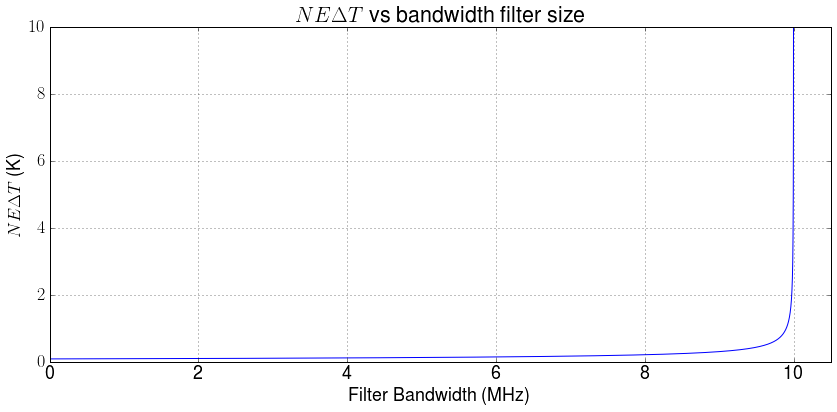

In [7]:
bfilt = numpy.linspace(1e3,9.999e6,10e3)
NEAT_FILTER = Tsys/sqrt((BSDR-bfilt)*tau)
matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})
#xfmt = plt.matplotlib.ticker.ScalarFormatter(useOffset=True)
#xfmt.set_powerlimits((-5,5))
fig = plt.figure(figsize=(14,6), dpi=300)
plot(bfilt,NEAT_FILTER)
xlabel('Filter Bandwidth (MHz)')
ylabel('$NE\Delta T$ (K)')
title('$NE\Delta T$ vs bandwidth filter size')
axis([0, 10.5e6, 0, 10])
def fmt_mhz(val,pos=None):
    return '%g' % (val / 1e6)
gca().xaxis.set_major_formatter(FuncFormatter(fmt_mhz))
#plt.ticklabel_format(style='sci', axis='x', useOffset=True, scilimits=(-5,5))
grid(True)

As expected this is an expotential increase.  We now want to look at what really happens with a radiometer and more specifically with a software defined radio radiometer.  If we assume that our noise source is constant then we can look at the total power values.

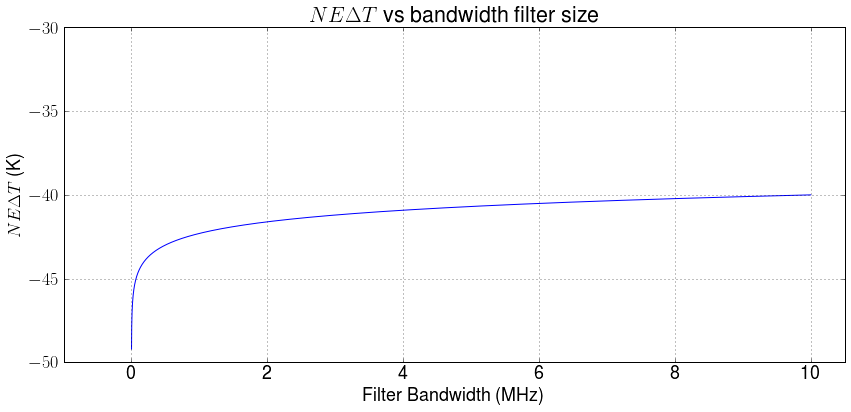

In [21]:
t_pwr = -40-log(10e6/bfilt);
matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})
#xfmt = plt.matplotlib.ticker.ScalarFormatter(useOffset=True)
#xfmt.set_powerlimits((-5,5))
fig = plt.figure(figsize=(14,6), dpi=300)
plot(bfilt,t_pwr)
xlabel('Filter Bandwidth (MHz)')
ylabel('$NE\Delta T$ (K)')
title('$NE\Delta T$ vs bandwidth filter size')
axis([-1e6, 10.5e6, -50, -30])
def fmt_mhz(val,pos=None):
    return '%g' % (val / 1e6)
gca().xaxis.set_major_formatter(FuncFormatter(fmt_mhz))
#plt.ticklabel_format(style='sci', axis='x', useOffset=True, scilimits=(-5,5))
grid(True)